In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from sklearn.metrics import confusion_matrix
from numpy import linalg as la

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

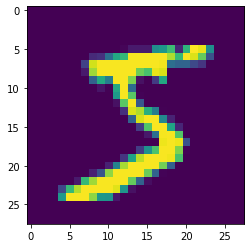

In [5]:
plt.imshow(x_train[0,:,:])

In [6]:
x_train[0,:,:].shape

(28, 28)

In [7]:
y_train[0]

5

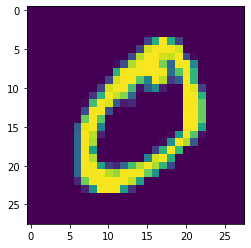

In [8]:
plt.imshow(x_train[1,:,:])

In [9]:
y_train[1]

0

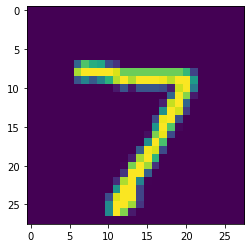

In [10]:
plt.imshow(x_test[0,:,:])

In [11]:
y_test[0]

7

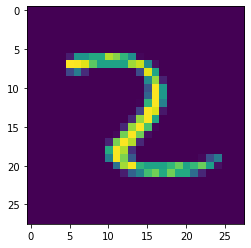

In [12]:
plt.imshow(x_test[2500,:,:])

In [13]:
y_test[2500]

2

In [14]:
784/16

49.0

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(784,activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

2022-01-18 18:23:14.951817: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.compile(optimizer="SGD", loss = 'mean_squared_error',metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=1)

2022-01-18 18:23:15.397065: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1875/1875 [==============================] - 3s 2ms/step - loss: 27.3179 - accuracy: 0.1008


In [18]:
test_predictions = model.predict(x_test)

In [19]:
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))

In [20]:
confusion

array([[102,  59,  91, 120, 133, 107, 103,  71, 103,  91],
       [112, 151, 162,  86,  90, 113, 100, 112,  76, 133],
       [146, 129,  49, 114, 108,  63,  79,  75, 120, 149],
       [103, 147, 104, 114, 102,  99, 108,  82,  86,  65],
       [131, 108, 137,  75,  82,  64, 128,  93,  97,  67],
       [ 78, 118,  61,  87,  97,  70,  81,  97,  89, 114],
       [130, 111,  56,  98,  79,  74,  80,  94, 110, 126],
       [100, 116,  93,  87,  92, 106, 102, 119,  95, 118],
       [118,  92,  92,  68,  83,  60, 103, 138, 112, 108],
       [103, 127,  67, 136, 115,  76,  98,  90,  92, 105]])

In [21]:
model.compile(optimizer="SGD", loss = 'mean_squared_error',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3150 - accuracy: 0.0994
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3138 - accuracy: 0.0987
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3131 - accuracy: 0.0970
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3125 - accuracy: 0.0992
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3119 - accuracy: 0.1006
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3115 - accuracy: 0.0991
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 27.3111 - accuracy: 0.1001
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 27.3107 - accuracy: 0.0992
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 27.3104 - accuracy: 0.1017
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - lo

In [22]:
test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
confusion

array([[ 63,  88,  93, 109, 106, 125, 108,  78,  95, 115],
       [ 86, 113, 104,  87, 128, 133, 137,  96, 110, 141],
       [108,  89,  83, 141, 102,  95, 108,  83, 102, 121],
       [ 88, 129,  90, 109,  74, 109, 110,  78,  98, 125],
       [118,  80,  80,  93, 113, 116, 110,  86,  83, 103],
       [ 87,  77,  69,  81,  92,  90,  93,  68, 106, 129],
       [ 96,  97,  71, 114,  75,  96, 111, 100, 102,  96],
       [ 98, 100,  91, 117,  84,  93, 108, 105, 103, 129],
       [ 73,  78,  88, 117,  78,  72, 126, 118,  96, 128],
       [ 92,  95, 101,  99, 115, 130,  88,  77, 106, 106]])

In [23]:
model.compile(optimizer="SGD", loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5016 - accuracy: 0.8470


In [25]:
test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
confusion

array([[ 958,    0,    2,    2,    0,    5,    5,    1,    7,    0],
       [   0, 1111,    3,    3,    0,    1,    5,    1,   11,    0],
       [  10,    0,  918,   19,   18,    4,   14,   14,   29,    6],
       [   3,    1,   24,  890,    1,   40,    1,   10,   30,   10],
       [   3,    2,    5,    0,  887,    1,   17,    2,    8,   57],
       [   5,    1,    7,   39,   10,  781,   12,    4,   24,    9],
       [  17,    2,    8,    2,   13,   19,  891,    0,    6,    0],
       [   4,   13,   30,    4,   13,    0,    0,  909,    9,   46],
       [   5,    4,   11,   20,   13,   26,    9,   10,  861,   15],
       [   6,    8,    2,    9,   60,   14,    1,   15,   13,  881]])

## Homework Question 2

In [26]:
x = np.random.randint(-5,5,(10,2))

In [27]:
x

array([[ 1, -2],
       [-4,  0],
       [ 4,  2],
       [-2,  1],
       [-4,  3],
       [ 4, -5],
       [ 2, -1],
       [-1,  2],
       [-2,  0],
       [ 2,  1]])

In [28]:
c1 = x[0,:]
c2 = x[1,:]
c3 = x[2,:]

In [29]:
dist1 = c1 - x
dist2 = c2 - x
dist3 = c3 - x

In [30]:
k1 = la.norm(dist1, axis=1)
k2 = la.norm(dist2, axis = 1)
k3 = la.norm(dist3, axis=1)

In [31]:
k1

array([0.        , 5.38516481, 5.        , 4.24264069, 7.07106781,
       4.24264069, 1.41421356, 4.47213595, 3.60555128, 3.16227766])

In [32]:
k2

array([5.38516481, 0.        , 8.24621125, 2.23606798, 3.        ,
       9.43398113, 6.08276253, 3.60555128, 2.        , 6.08276253])

In [33]:
k3

array([5.        , 8.24621125, 0.        , 6.08276253, 8.06225775,
       7.        , 3.60555128, 5.        , 6.32455532, 2.23606798])

In [34]:
clusters = np.argmin([k1,k2,k3], axis=0)

In [35]:
clusters

array([0, 1, 2, 1, 1, 0, 0, 1, 1, 2])

In [36]:
C1 = x[clusters==0]
C2 = x[clusters==1]
C3 = x[clusters==2]

In [54]:
centroids = np.array([c1, c2, c3])
centroids

array([[ 1, -2],
       [-4,  0],
       [ 4,  2]])

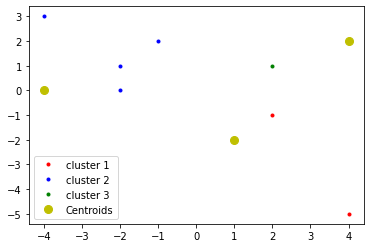

In [60]:
plt.plot(C1[:,0],C1[:,1],'r.', label='cluster 1')
plt.plot(C2[:,0],C2[:,1],'b.', label='cluster 2')
plt.plot(C3[:,0],C3[:,1],'g.', label='cluster 3')
plt.plot(centroids[:,0], centroids[:,1], 'yo', markersize=8, label='Centroids')
plt.legend(loc='best')
plt.show()

## Homework Question 3

In [43]:
x11 = np.random.standard_normal((200,1))*1.2+np.ones((200,1))-2
x12 = np.random.standard_normal((200,1))*0.8+np.ones((200,1))-2
x1= np.concatenate((x11,x12),axis=1)

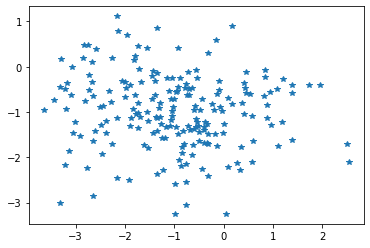

In [62]:
plt.plot(x1[:,0], x1[:,1], '*')

In [45]:
x21 = np.random.standard_normal((200,1))*0.9+np.ones((200,1))
x22 = np.random.standard_normal((200,1))*0.7+np.ones((200,1))
x2 = np.concatenate((x21,x22),axis=1)

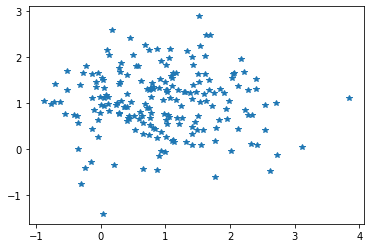

In [63]:
plt.plot(x2[:,0], x2[:,1], '*')

In [47]:
x31 = np.random.standard_normal((200,1))*0.8+np.ones((200,1))+3
x32 = np.random.standard_normal((200,1))*0.5+np.ones((200,1))+4
x3 = np.concatenate((x31,x32),axis=1)

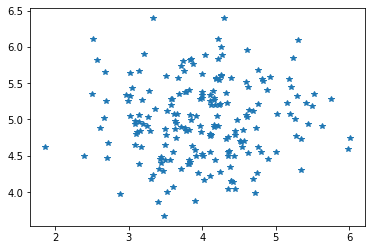

In [64]:
plt.plot(x3[:,0], x3[:,1], '*')

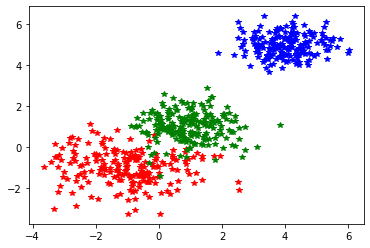

In [49]:
X = np.concatenate((x1,x2,x3),axis=0)
plt.plot(X[0:200,0],X[0:200,1],'r*')
plt.plot(X[200:400,0], X[200:400,1],'g*')
plt.plot(X[400:600,0],X[400:600,1],'b*')

In [68]:
import scipy
from scipy.spatial.distance import cdist
x = X
k = 3
no_of_iterations = 5
idx = np.sort(np.random.choice(len(x),k,replace=False))